# Tarea 2 -  ING4101 Minería de Datos
### Profesor: Luis Cossio
### Ayudante: Antonia Púa
### Ayudante Corrector: Jonathan Alvear

- Integrantes: Sebastían Acevedo Ulloa
- Fecha de entrega: 02 de junio de 2025




## Objetivos:

* Uso de notebooks de Python y entrega de informes basados en esta herramienta.
* Aplicar tecnicas de analisis estadistico y preprocesamiento de datos
* Comprender como dividir los datos para entrenamiento y prueba de los modelos.
* Seleccionar los mejores atributos para clasificar usando PCA.
* Entrenar distintos modelos para hacer clasificación binaria (Entre dos posibles clases).
* Realizar un análisis de métricas de desempeño y hacer una comparación
 de los modelos para asi seleccionar el mejor modelo en base a los resultados.


## Instrucciones de la tarea:

* La tarea a realizar se debe presentar en grupos de **2 personas**, cualquier copia o plagio será sancionada con nota 1.0 a todos los involucrados y con posible sumario.
* La presente tarea tiene como objetivo comprender el funcionamiento del escalamiento de datos y del Análisis de Componentes Principales (PCA), aplicarlos correctamente y entrenar distintos modelos de clasificación. Posteriormente, se evaluará el desempeño de estos modelos utilizando métricas específicas, con el fin de seleccionar el modelo y la configuración más adecuados.
* Durante todo el proceso, se deberán aplicar los conceptos de minería de datos abordados en el curso.
* Las soluciones en código y las interpretaciones de los resultados deben incluirse en el mismo notebook que funciona como informe, y serán parte de la evaluación final.
* La tarea debe contener una sección de discusión, conclusión y selección del mejor modelo, en base a los resultados obtenidos, sientase libre de explayarse profundamente en este punto.
* Para la presentación final de la tarea se debe subir su notebook Python en formato .ipynb

## Introducción
El auge del internet ha traído consigo una transformación profunda en la forma en que las personas se comunican, acceden a información y realizan transacciones. Sin embargo, este desarrollo también ha generado nuevas amenazas a la seguridad digital, siendo una de las más comunes el phishing. Esta técnica fraudulenta busca engañar a los usuarios para obtener información confidencial como contraseñas, números de tarjetas o datos bancarios, suplantando la identidad de sitios legítimos.

La detección temprana de sitios web de phishing es una tarea crucial para proteger a los usuarios y a las organizaciones frente a posibles ciberataques. En este contexto, el uso de algoritmos de aprendizaje automático se ha vuelto una herramienta fundamental, ya que permite identificar patrones comunes en sitios maliciosos y clasificarlos con un alto grado de precisión.

El conjunto de datos proporcionado incluye 11.430 URL con 87 características extraídas. Está diseñado para usarse como referencia para sistemas de detección de phishing basados ​​en aprendizaje automático. Las características provienen de tres clases diferentes: 56 extraídas de la estructura y sintaxis de las URL, 24 del contenido de sus páginas correspondientes y 7 extraídas mediante consultas a servicios externos. El conjunto de datos está equilibrado y contiene exactamente un 50 % de URLs de phishing y un 50 % de URLs legítimas.

Este dataset es ideal para abordar un problema de clasificación binaria supervisada, en esta tarea se aplicarán y compararán diversos algoritmos de aprendizaje automático, tales como:

- K-Nearest Neighbors (KNN),
- Regresión Logística,
- Naive Bayes,
- Árbol de Decisión.

El objetivo principal es evaluar el desempeño de estos modelos y determinar cuál de ellos ofrece mejores resultados en términos de precisión, recall, F1-score y otras métricas clave para la detección de sitios web fraudulentos.

---
##Créditos
Dataset:
Hannousse, Abdelhakim; Yahiouche, Salima (2021), “Web page phishing detection”, Mendeley Data, V3, doi: 10.17632/c2gw7fy2j4.3

- Licence: Attribution 4.0 International (CC BY 4.0)
- Web page phishing detection [Data set]. Mendeley Data. https://doi.org/10.17632/c2gw7fy2j4.3


## Parte 1: Carga de datos y análisis exploratorio
En esta sección deben realizar una primera exploración del conjunto de datos **Phishing Websites**, con el objetivo de familiarizarse con su estructura y contenido antes de aplicar modelos de clasificación binaria.

1. Cargue el dataset utilizando la función `pd.read_csv` y visualice las primeras 5 filas con la función `head()`.
2. Muestre la cantidad de instancias y columnas del dataset usando la función `df.shape` e indique explícitamente el número total de filas (instancias) y columnas (atributos).
3. Utilice la función de pandas `describe()` para obtener un resumen estadístico de las columnas numéricas del dataset.
4. Identifique la cantidad de valores nulos por columna con `df.isnull().sum()`.
5. Realice un resumen de los tipos de datos de las columnas del dataset  utilizando `df.dtypes`, identifique cuáles son las columnas categóricas (por ejemplo, tipo `object`) y cuáles son numéricas (por ejemplo, `int64` o `float64`).
6. Inspeccione la distribución de la columna categórica `"status"` —que indica si un sitio es phishing o legítimo— usando `value_counts()`.
7. Transforme la variable `status` a una nueva columna binaria llamada `"Target"`, donde `1` representa sitios phishing y `0` sitios legítimos.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [53]:
#Cargar Base de datos
![[ -d "/content/T2_MD" ]] || git clone https://github.com/SebastianAU/T2_MD.git

Base_de_datos = "/content/T2_MD/Dataset/dataset_phishing.csv"
df = pd.read_csv(Base_de_datos,delimiter=",")


In [54]:
print("Primeras 5 filas:")
display(df.head())

print(f"Número total de instancias: {df.shape[0]}")
print(f"Número total de columnas: {df.shape[1]}")

print("\nResumen estadístico de las columnas numéricas:")
display(df.describe())

print("\nCantidad de valores nulos por columna:")
display(df.isnull().sum())

print("\nTipos de datos por columna:")
display(df.dtypes)

# Identificación de columnas categóricas y numéricas
columnas_categoricas = df.select_dtypes(include=['object']).columns.tolist()
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nColumnas categóricas:", columnas_categoricas)
print("Columnas numéricas:", columnas_numericas)

print("\nDistribución de la columna status:")
display(df['status'].value_counts())

# Transformación de la variable 'status' a una nueva columna binaria 'Target'
df['Target'] = df['status'].map({'phishing': 1, 'legitimate': 0})
print("\nPrimeras filas con la nueva columna 'Target':")
display(df[['status', 'Target']].head())


Primeras 5 filas:


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


Número total de instancias: 11430
Número total de columnas: 89

Resumen estadístico de las columnas numéricas:


,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000



Cantidad de valores nulos por columna:


,0
url,0
length_url,0
length_hostname,0
ip,0
nb_dots,0
...,...
web_traffic,0
dns_record,0
google_index,0
page_rank,0



Tipos de datos por columna:


,0
url,object
length_url,int64
length_hostname,int64
ip,int64
nb_dots,int64
...,...
web_traffic,int64
dns_record,int64
google_index,int64
page_rank,int64



Columnas categóricas: ['url', 'status']
Columnas numéricas: ['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'nb_redirection', 'nb_external_redirection', 'length_words_raw', 'char_repeat', 'shortest_words_raw', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host', 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_ext

,count
status,
legitimate,5715
phishing,5715



Primeras filas con la nueva columna 'Target':


,status,Target
0,legitimate,0
1,phishing,1
2,phishing,1
3,legitimate,0
4,legitimate,0


## Parte 2: Preprocesamiento del conjunto de datos y análisis exploratorio de dimensionalidad

En esta sección deberán seleccionar las variables que utilizarán como características para construir el modelo de clasificación, y dividir el conjunto de datos en subconjuntos de entrenamiento y prueba. Además, escalarán los datos y explorarán la posibilidad de reducir la dimensionalidad mediante PCA (Análisis de Componentes Principales).

1. Seleccione las columnas que se utilizarán como variables predictoras (`X`), excluyendo la columna objetivo `"Target"` y `"Status"` y cualquier otra columna que no aporte valor predictivo directo, como identificadores (`"url"`, por ejemplo).

2. Defina la columna `"Target"` como la variable a predecir (`y`).

3. Genere un gráfico en 2D seleccionando de forma aleatoria **dos características distintas del conjunto de variables `X`**, y represente los puntos coloreados según su clase (`Target`).  
Realice este experimento **al menos tres veces** con combinaciones distintas de variables, y deje registro de los tres gráficos generados.

  *Hint:* Pueden hacerlo directamente con el DataFrame original excluyendo las columnas `"Status"` y `"url"`, utilizando `"Target"` como categoria. Alternativamente, pueden usar las variables `X` e `y` definidas en el punto anterior e indexarlas según corresponda. Queda a su criterio el método a utilizar. **Use una semilla para mantener el resultado en la revision de la tarea.**

  **Comente brevemente:**
  - **¿Se observa algún patrón que permita distinguir visualmente las clases en alguno de los gráficos?**

4. Utilice la función `train_test_split` de `sklearn.model_selection` para dividir el conjunto de datos en dos partes:
   - Conjunto de entrenamiento (70%)
   - Conjunto de prueba (30%)

  Utilice el parámetro `random_state` para asegurar la reproducibilidad (semilla).

5. Imprima la forma de los conjuntos `X_train`, `X_test`, `y_train` y `y_test` para confirmar que la división fue realizada correctamente.

6. Escale los conjuntos de `X_train` y `X_test` utilizando `StandardScaler` de `sklearn.preprocessing`.

7. Aplique PCA (Análisis de Componentes Principales) para explorar la posibilidad de reducir la dimensionalidad del conjunto de características:
   - Importe `PCA` desde `sklearn.decomposition`.
   - Cree un modelo de PCA sin limitar el número de componentes, para observar cuánta varianza explica cada uno.
   - Ajuste el modelo **solo sobre `X_train` escalado**.
   - Genere un gráfico que muestre la **varianza explicada por cada componente principal** (`pca.explained_variance_ratio_`).
   - Este gráfico les permitirá evaluar visualmente cuántos componentes podrían retener suficiente información (por ejemplo, el 90-95% de la varianza total). También grafiqué la **varianza acumulada** para una mejor interpretación.




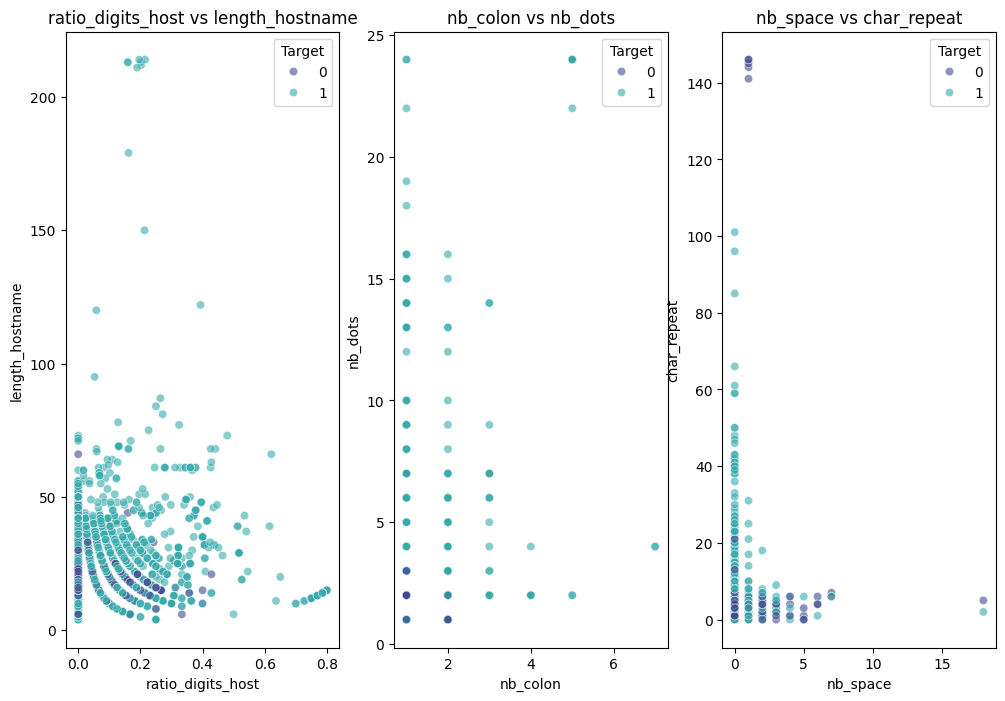

In [74]:
# Eliminar columnas que no aportan información util

df_col = df.copy() #Voy a definir otro dataframe identico para no modificar el original

for col in df_col.columns:
    if df_col[col].nunique() <= 5:
        df_col.drop(columns=[col], inplace=True)

# Ademas se excluiran las variables de etiqueta y la variable objetivo
excluir = ['status', 'Target', 'url']

X = df_col.drop(columns=excluir, errors='ignore')
y = df['Target']

# Se utiliza random seed para poder seleccionar caracteristicas de manera aleatoria
random.seed()

# Generar 3 pares de columnas aleatorias distintas
features = list(X.columns)
columnas = random.sample(list(zip(random.sample(features, len(features)), random.sample(features, len(features)))), 3)

#Grafica
plt.figure(figsize=(12, 8))
for i, (feat1, feat2) in enumerate(columnas):
    if feat1 == feat2:
        continue
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=X[feat1], y=X[feat2], hue=y, palette='mako', alpha=0.6)
    plt.title(f'{feat1} vs {feat2}')
    plt.xlabel(feat1)
    plt.ylabel(feat2)
plt.show()

*¿Se observa algún patrón que permita distinguir visualmente las clases en alguno de los gráficos?*

`"1. ratio_digits_host vs length_hostname"`

Los sitios legítimos Se concentran principalmente en la parte inferior del gráfico, con longitudes de hostname más cortas y ratios de dígitos bajos.
Con respecto a los sitios pishing, en ese caso hay mayor dispersión, especialmente hacia valores más altos de length_hostname, con algunos casos de outliers

`"2.  nb_colon vs nb_dots"`

Los sitios legítimos se agrupan en bajos balores de ambos. En cuanto a los phishing se dispersan más ampliamente, especialmente hacia valores más altos de nb_colon y nb_dots

`"3. nb_space vs char_repeat"`

Casi todos los legítimos se concentran en el origen, aunque hay ciertos valores sobretodo en char_repeat bajos que están mas alejados del origen. Cabe mencionar que en char_repeat ademas se presentan outliers en valores muy altos.

Para finalizar los sitios de phishing presentan una distribución más amplia, especialmente con valores más altos de char_repeat, lo que sugiere URLs con patrones de caracteres repetitivos.



Tamaño de los conjuntos:
X_train: (8001, 42)
X_test:  (3429, 42)
y_train: (8001,)
y_test:  (3429,)


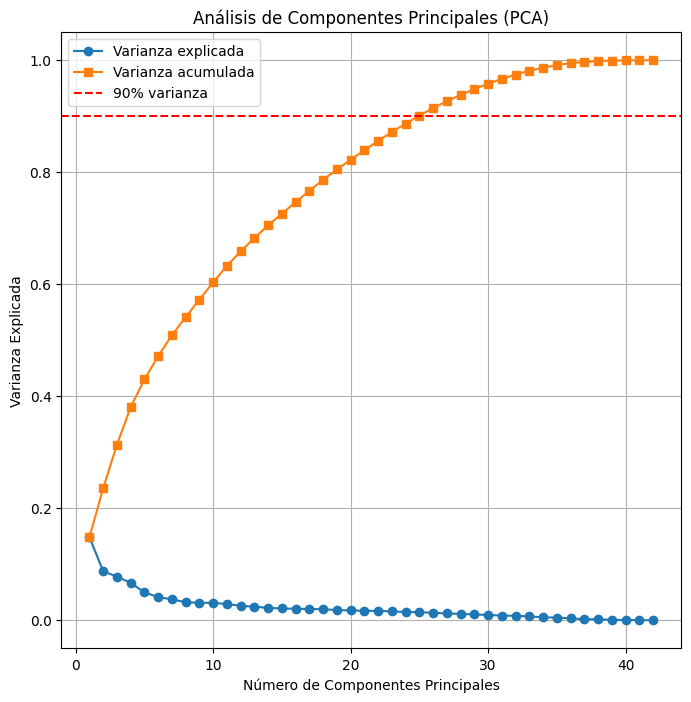

In [56]:
# Entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Tamaño de los conjuntos:")
print("X_train:", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train:", y_train.shape)
print("y_test: ", y_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar PCA
pca = PCA()
pca.fit(X_train_scaled)

# Varianza explicada por cada componente
var_exp = pca.explained_variance_ratio_
var_acu = np.cumsum(var_exp)

# Gráfico
plt.figure(figsize=(8, 8))
plt.plot(range(1, len(var_exp) + 1), var_exp, marker='o', label='Varianza explicada')
plt.plot(range(1, len(var_acu) + 1), var_acu, marker='s', label='Varianza acumulada')
plt.axhline(y=0.9, color='red', linestyle='--', label='90% varianza')
plt.title('Análisis de Componentes Principales (PCA)')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.legend()
plt.grid(True)
plt.show()

### **Análisis e interpretación de los resultados del PCA**

Con base en los gráficos generados en la sección anterior (varianza explicada por componente y varianza acumulada), analice e interprete los resultados del Análisis de Componentes Principales.

1. ¿Qué **porcentaje de la varianza total** es explicado por los primeros componentes principales?  

2. Genere un gráfico de dispersión 2D utilizando las **dos primeras componentes principales** (PC1 y PC2), coloreando los puntos según su clase (`Target`).  
   - **¿Se observa un patrón o separación visual entre las clases en este plano?**  
   - Responda brevemente: sí o no, y comente si esto refuerza la utilidad del PCA en este contexto.

3. **En función de su análisis anterior, responda:**
   - ¿Considera adecuado aplicar PCA en este caso antes de entrenar el modelo de clasificación?
   - Si su respuesta es afirmativa, indique cuántos componentes utilizaría y justifique su decisión en términos del equilibrio entre reducción de dimensionalidad y preservación de la información.

4. **Selección de componentes principales**

   Con base en el análisis de varianza explicada y varianza acumulada realizado en los pasos anteriores:

   - Seleccione la cantidad de componentes principales sugerida por el análisis que permiten conservar al menos el **90% de la varianza total del conjunto de datos**.
   - Aplique una nueva transformación PCA sobre los datos de entrenamiento y prueba (`X_train` y `X_test` ya escalados), pero esta vez especificando `n_components` con el valor identificado anteriormente.
   - Utilice estos nuevos conjuntos transformados como entrada (`X_train_pca`, `X_test_pca`) para el desarrollo del modelo de clasificación en la siguiente sección.

   > Nota: Esta selección de componentes permitirá trabajar con una versión reducida del dataset, conservando la mayoría de la información original y reduciendo la complejidad del modelo.


--------------------------------------------------------------------------------
`"1. ¿Qué **porcentaje de la varianza total** es explicado por los primeros componentes principales?"`

A los 10 componentes ya se explica un 60% de la varianza total, llegando a aproximadamente 25 componentes se explica un total del 90% de la varianza, lo cual indica que se puede reducir la dimensionalidad de los datos, sin perder demasiada información.

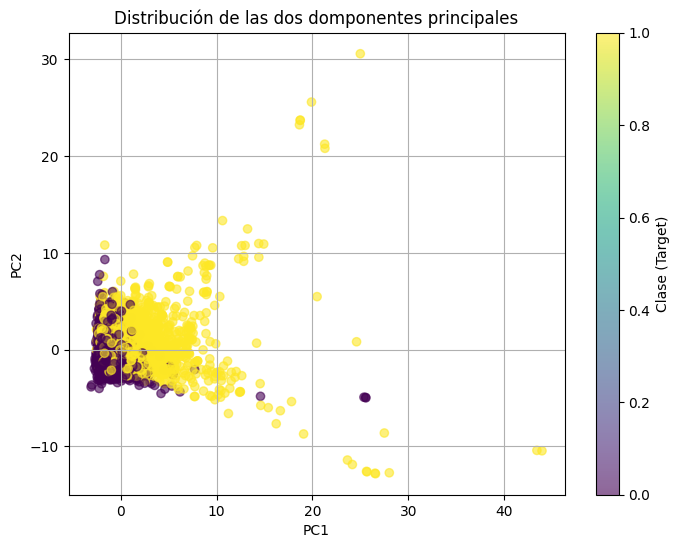

In [57]:
X_train_pca = pca.transform(X_train_scaled)[:, :2]

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],c=y_train, cmap='viridis', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Distribución de las dos domponentes principales')
plt.colorbar(scatter, label='Clase (Target)')
plt.grid(True)
plt.show()

`"¿Se observa un patrón o separación visual entre las clases en este plano?"`

Sí, se observa una separación visual. Los puntos morados se concentran principalmente en la región inferior izquierda del gráfico, mientras que los puntos amarillos se distribuyen especialmente hacia la derecha y parte superior del plano. Aunque si bien existen puntos que se mezclan entre si, se puede notar un patron general.

`"Responda brevemente: sí o no, y comente si esto refuerza la utilidad del PCA en este contexto."`

Si, Esto refuerza significativamente la utilidad del PCA, ya que las dos primeras componentes principales logran capturar patrones entre las clases, reduciendo la dimensionalidad del problema mientras se mantiene información importante para la clasificación.


`"3.En función de su análisis anterior, responda:"`

   `"- ¿Considera adecuado aplicar PCA en este caso antes de entrenar el modelo de clasificación?"`

   Si, considero adecuado aplicar PCA, ya que eso permite trabajar con menos variables sin perder información importante, ademas elimina correlaciones entre variables originales y puede mejorar el rendimiento del entrenamiento

   `"- Si su respuesta es afirmativa, indique cuántos componentes utilizaría y justifique su decisión en términos del equilibrio entre reducción de dimensionalidad y preservación de la información."`

   Basandonos en los graficos anteriores, utilizaria 24 componentes, ya que con ello, se preserva aproximadamente un 90% de la información.

In [58]:
pca_final = PCA(n_components=24)
X_train_pca = pca_final.fit_transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test_scaled)

## Parte 3: Entrenamiento y evaluación de modelos

En esta etapa deberán entrenar y comparar distintos modelos de clasificación binaria para predecir si un sitio es phishing o no, utilizando los datos de entrenamiento previamente escalados y reducidos mediante el pca realizado (`X_train_scaled_pca` y `X_test_scaled_pca`).

### Objetivo:
Identificar cuál modelo ofrece el mejor desempeño general en la detección de sitios phishing, basándose en métricas de evaluación y en el análisis de resultados.

### Actividades generales:
- Entrenar los siguientes modelos:
  - K-Nearest Neighbors (KNN), probando distintas combinaciones de hiperparámetros.
  - Regresión Logística.
  - Naive Bayes.
  - Árbol de Decisión.

- Evaluar cada modelo utilizando:
  - La función `classification_report` para obtener precisión, recall y F1-score.
  - La matriz de confusión.

- Comparar los modelos mediante:
  - Una tabla resumen de métricas clave.
  - Un gráfico comparativo (opcional).

A continuación, se abordarán estos modelos por separado en los subapartados siguientes (3.1 a 3.4), con instrucciones específicas para cada uno.

### 3.1: Evaluación de variantes del modelo K-Nearest Neighbors (KNN)

En esta sección deberán construir y evaluar diferentes variantes del modelo **K-Nearest Neighbors (KNN)** para analizar cómo influyen sus hiperparámetros en el rendimiento del clasificador.

1. Construya y entrene al menos **cuatro modelos KNeighborsClassifier** variando los siguientes parámetros:
   - `n_neighbors`: número de vecinos a considerar para la clasificación.
   - `weights`: peso asignado a los vecinos (`'uniform'` o `'distance'`).
   - `metric`: métrica de distancia (por ejemplo: `'euclidean'`, `'manhattan'`).
2. Evalúe cada modelo utilizando las métricas: Precisión, Recall, F1-score (usando `classification_report(y_test, y_pred, digits=4)`) y realice una matriz de confusión.
3. Analice los resultados obtenidos por cada variante y determine cuál entrega mejores resultados en este problema de clasificación (*recomendación: haga una tabla comparativa de las 4 variantes de knn y sus metricas*).

Elija la variante de KNN con mejor desempeño para comparar desde el siguiente algoritmo hasta el final de este trabajo

Reporte de clasificación:


KNN 1:
   precision  recall  f1-score
0       0.91    0.93      0.92
1       0.93    0.91      0.92


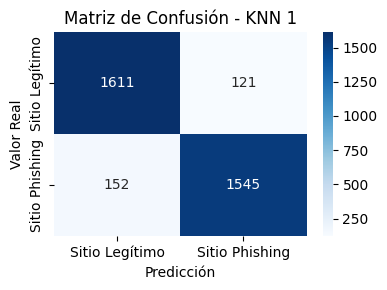


KNN 2:
   precision  recall  f1-score
0       0.92    0.94      0.93
1       0.93    0.92      0.92


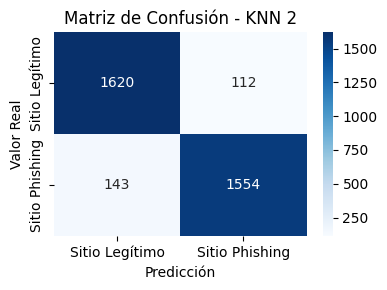


KNN 3:
   precision  recall  f1-score
0       0.91    0.93      0.92
1       0.92    0.91      0.92


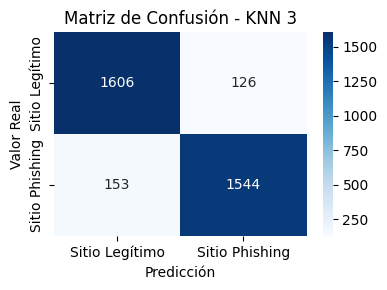


KNN 4:
   precision  recall  f1-score
0       0.92    0.94      0.93
1       0.94    0.92      0.93


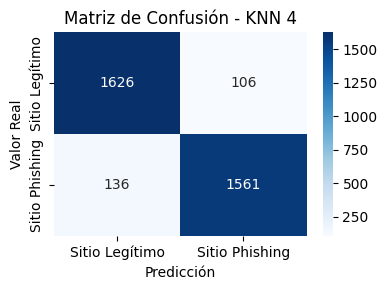


Tabla comparativa de modelos KNN:


,Modelo,n_neighbors,weights,metric,precision,recall,f1-score
3,KNN 4,9,distance,manhattan,0.9296,0.9293,0.9294
1,KNN 2,5,distance,euclidean,0.9258,0.9255,0.9256
0,KNN 1,3,uniform,euclidean,0.9206,0.9203,0.9204
2,KNN 3,7,uniform,manhattan,0.9188,0.9185,0.9186


In [62]:
knn_variants = [
    {'n_neighbors': 3, 'weights': 'uniform', 'metric': 'euclidean'},
    {'n_neighbors': 5, 'weights': 'distance', 'metric': 'euclidean'},
    {'n_neighbors': 7, 'weights': 'uniform', 'metric': 'manhattan'},
    {'n_neighbors': 9, 'weights': 'distance', 'metric': 'manhattan'}
]

target_names = ["Sitio Legítimo", "Sitio Phishing"]
results = []
y_pred_knn = {}

print("Reporte de clasificación:\n")

for i, params in enumerate(knn_variants, 1):
    model = KNeighborsClassifier(**params)
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    # Guardar predicciones
    var_name = f'y_pred_knn_{i}'
    y_pred_knn[var_name] = y_pred

    # Reporte de métricas
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    report_clean = report_df.loc[['0', '1'], ['precision', 'recall', 'f1-score']].round(2)

    print(f"\nKNN {i}:")
    print(report_clean)

    avg_f1 = report_df.loc[['0', '1']]['f1-score'].mean()
    avg_precision = report_df.loc[['0', '1']]['precision'].mean()
    avg_recall = report_df.loc[['0', '1']]['recall'].mean()

    results.append({
        'Modelo': f'KNN {i}',
        'n_neighbors': params['n_neighbors'],
        'weights': params['weights'],
        'metric': params['metric'],
        'precision': round(avg_precision, 4),
        'recall': round(avg_recall, 4),
        'f1-score': round(avg_f1, 4)
    })

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names, yticklabels=target_names)
    plt.title(f"Matriz de Confusión - KNN {i}")
    plt.xlabel("Predicción")
    plt.ylabel("Valor Real")
    plt.tight_layout()
    plt.show()

# Mostrar tabla comparativa
results_df = pd.DataFrame(results)
print("\nTabla comparativa de modelos KNN:")
display(results_df.sort_values(by='f1-score', ascending=False))

El cuarto modelo de KNN es el que presenta las mejores metricas y por ende la menor cantidad de errores al predecir. Debido a esto sera el que se utilizará mas adelante para las comparaciones

### Parte 3.2: Entrenamiento del modelo de Regresión Logística
En esta sección se entrenará un modelo de **Regresión Logística** para abordar el problema de clasificación binaria. Este algoritmo es ampliamente utilizado en tareas de clasificación por su simplicidad, interpretabilidad y buen desempeño.

1. Utilice la clase `LogisticRegression` de la biblioteca `sklearn.linear_model`.
2. Entrene el modelo utilizando el conjunto `X_train_scaled_pca` y `y_train`.
3. Genere predicciones con el conjunto `X_test_scaled_pca`.
4. Evalúe el rendimiento del modelo utilizando:
   - `classification_report(y_test, y_pred, digits=4)`
   - Matriz de confusión
5. Comente brevemente los resultados obtenidos y cómo se comparan con las variantes de KNN entrenadas anteriormente.

Reporte de clasificación:

                precision  recall  f1-score
Sitio Legítimo       0.89    0.88      0.88
Sitio Phishing       0.88    0.89      0.88


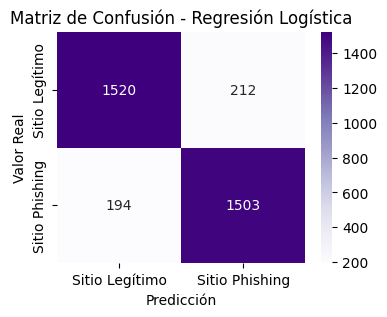

In [ ]:
# Entrenar el modelo
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train_pca, y_train)

# Generar predicciones
y_pred_log = log_model.predict(X_test_pca)

# Reporte de clasificación
report_log = classification_report(y_test, y_pred_log, target_names=target_names, output_dict=True)
report_df_log = pd.DataFrame(report_log).transpose()
print("Reporte de clasificación:\n")
print(report_df_log.loc[target_names, ['precision', 'recall', 'f1-score']].round(2))

# Matriz de confusión graficada
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Purples',
            xticklabels=target_names, yticklabels=target_names)
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

Los resultados obtenidos no son malos, las predicciones realizadas tienen una precisión bastante alta, sin embargo, si se compara con el modelo KNN del punto anterior tiene aproximadamente un 4% menos de precición (Teniendo el modelo KNN un 92% y el modelo de regresión un 88%)

### Parte 3.3: Entrenamiento del modelo Naive Bayes

En esta sección se implementará y evaluará el modelo **Naive Bayes**, un clasificador probabilístico basado en el teorema de Bayes con una fuerte (aunque muchas veces irreal) suposición de independencia entre las características.

1. Utilice el modelo `GaussianNB` de la librería `sklearn.naive_bayes`.
2. Entrene el modelo con los datos escalados (`X_train_scaled_pca`, `y_train`).
3. Realice predicciones sobre el conjunto de prueba (`X_test_scaled_pca`).
4. Evalúe el rendimiento del modelo utilizando:
   - `classification_report(y_test, y_pred, digits=4)`
   - Matriz de confusión

5. Discuta los resultados obtenidos y comente brevemente cómo se comparan con los modelos previos como KNN y regresión logística.

Reporte de clasificación:

                precision  recall  f1-score
Sitio Legítimo       0.69    0.91      0.78
Sitio Phishing       0.86    0.58      0.69


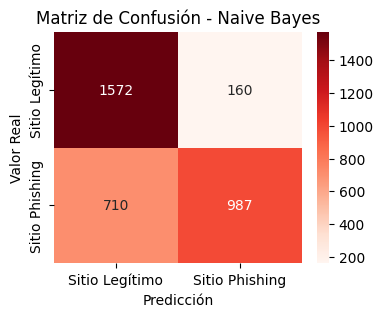

In [ ]:
# Entrenar el modelo
nb_model = GaussianNB()
nb_model.fit(X_train_pca, y_train)

# Realizar predicciones
y_pred_nb = nb_model.predict(X_test_pca)

# Reporte de clasificación
report_nb = classification_report(y_test, y_pred_nb, target_names=target_names, output_dict=True)
report_df_nb = pd.DataFrame(report_nb).transpose()
print("Reporte de clasificación:\n")
print(report_df_nb.loc[target_names, ['precision', 'recall', 'f1-score']].round(2))

# Matriz de confusión graficada
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Reds',
            xticklabels=target_names, yticklabels=target_names)
plt.title("Matriz de Confusión - Naive Bayes")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

Este modelo tiene una precisión general baja al detectar sitios legítimos, aunque para los sitios de phishing tiene un rendimiento similar a los otros modelos, pero este modelo tiene una alarmante cantidad de sitios que son predecidos como legítimos, pero son realmente sitios de phishing.

A comparación de los otros modelos la precisión para legítimo y phishing es la peor, con KNN= 0.92 y 0.94 Reg= 0.89 y 0.88 y por último Naive= 0.69 y 0.86

Este modelo tiene menos errores al predecir que el sitio es de phishing, pero realmente es legítimo a comparación del de regresión, pero no supera al de KNN.
Y como ya fue comentado anteriormente, los sitios que son predecidos como legítimos pero son phishing son mas altos que en todos los otros modelos.

### Parte 3.4: Entrenamiento del modelo Árbol de Decisión

En esta sección se implementará y evaluará un modelo de **Árbol de Decisión**, el cual se basa en dividir el espacio de decisiones en función de reglas aprendidas a partir de los datos. Es un modelo intuitivo y visualmente interpretable, capaz de capturar relaciones no lineales.

1. Utilice la clase `DecisionTreeClassifier` de la librería `sklearn.tree`.
2. Entrene el modelo con los datos escalados (`X_train_scaled_pca`, `y_train`).
3. Realice predicciones sobre el conjunto de prueba (`X_test_scaled_pca`).
4. Evalúe el rendimiento del modelo utilizando:
   - `classification_report(y_test, y_pred, digits=4)`
   - Matriz de confusión
5. Comente brevemente los resultados obtenidos y compárelos con los modelos previamente entrenados.

Reporte de clasificación:

                precision  recall  f1-score
Sitio Legítimo       0.87    0.85      0.86
Sitio Phishing       0.85    0.87      0.86


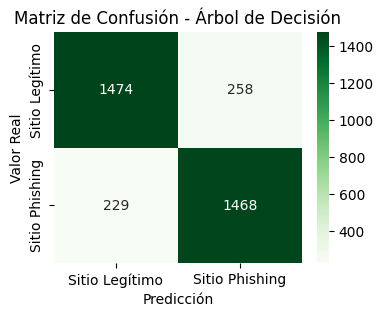

In [ ]:
# Entrenar modelo
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_pca, y_train)

# Predicciones
y_pred_tree = tree_model.predict(X_test_pca)

# Reporte de clasificación
report_tree = classification_report(y_test, y_pred_tree, target_names=target_names, output_dict=True)
report_df_tree = pd.DataFrame(report_tree).transpose()
print("Reporte de clasificación:\n")
print(report_df_tree.loc[target_names, ['precision', 'recall', 'f1-score']].round(2))

# Matriz de confusión graficada
cm_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens',
            xticklabels=target_names, yticklabels=target_names)
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

Este modelo tiene unas metricas bastante decentes, predice un aproximado del 86% de las predicciones de manera correcta y los que clasifica de manera incorrecta no son una cantidad muy alta.

A comparación de los otros modelos la precisión para legítimo y phishing es intermedia. Las predicciones quedan de la manera siguiente: con KNN= 0.92 y 0.94 Reg= 0.89 y 0.88 Árbol= 0.87 y 0.85 y por último Naive= 0.69 y 0.86

Queda en tercer lugar en cuanto a precicion se refiere, siendo mejor que Naive, pero peor que los otros modelos.

Este modelo es el peor   al predecir que el sitio es de phishing, pero realmente es legítimo a comparación de los otros modelos, aun asi no tiene una cantidad extremandamente alta de errores. Los sitios que son predecidos como legítimos pero son phishing son menos que en el modelo de Naive, pero son más que en KNN y regresión.


## Parte 4: Comparación final de modelos y conclusión

En esta sección deberán analizar y comparar los resultados obtenidos por los cuatro modelos de clasificación entrenados:

- K-Nearest Neighbors (KNN)
- Regresión Logística
- Árbol de Decisión
- Naive Bayes

### Actividades:

1. Construya una **tabla comparativa** que incluya los siguientes valores para cada modelo:
   - `Accuracy`
   - `Precisión (clase 1)`
   - `Recall (clase 1)`
   - `F1-score (clase 1)`

  Ordene la tabla **de mayor a menor según el valor de `accuracy`**, para facilitar la comparación de desempeño general.

2. Analice la tabla y **seleccione el modelo que obtuvo el mejor rendimiento global**, justificando brevemente su elección con base en las métricas obtenidas, especialmente aquellas asociadas a la **clase 1 (phishing)**.

3. Finalmente, redacte una **conclusión general del trabajo**, considerando:
   - Cuál modelo recomendaría para este problema y por qué.
   - Qué importancia tienen el preprocesamiento de datos realizado en la parte 2.
   - Qué importancia tiene aplicar PCA en los datos.
   - Qué aspectos aprendió del análisis comparativo entre modelos.

>*Puede complementar su análisis con visualizaciones (opcional) o comentarios sobre la interpretabilidad, eficiencia o aplicabilidad práctica de los modelos.*

In [75]:
comparación = []

# Diccionario de modelos
model_names = {
    "KNN": y_pred_knn['y_pred_knn_4'],
    "Regresión Logística": y_pred_log,
    "Naive Bayes": y_pred_nb,
    "Árbol de Decisión": y_pred_tree
}

for name, y_pred in model_names.items():
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report["1"]["precision"]
    recall = report["1"]["recall"]
    f1 = report["1"]["f1-score"]

    comparación.append({
        "Modelo": name,
        "Accuracy": round(accuracy, 4),
        "Precisión": round(precision, 4),
        "Recall": round(recall, 4),
        "F1-score": round(f1, 4)
    })

# Dataframe
resultados_df = pd.DataFrame(comparación)
resultados_df = resultados_df.sort_values(by="Accuracy", ascending=False)

# Mostrar tabla
print("Comparación de modelos de clasificación:\n")
display(resultados_df.reset_index(drop=True))

Comparación de modelos de clasificación:



,Modelo,Accuracy,Precisión,Recall,F1-score
0,KNN,0.9294,0.9364,0.9199,0.9281
1,Regresión Logística,0.8816,0.8764,0.8857,0.8810
2,Árbol de Decisión,0.8580,0.8505,0.8651,0.8577
3,Naive Bayes,0.7463,0.8605,0.5816,0.6941


Modelo seleccionado: K-Nearest Neighbors

El modelo KNN obtiene el mejor rendimiento global con métricas consistentemente superiores al resto de modelos

Accuracy: 92.94% - La más alta de todos los modelos

Precisión: 93.64% - Excelente capacidad para evitar falsos positivos

Recall: 91.99% - Alta capacidad de detectar sitios de phishing reales

F1-score: 92.81% - El mejor balance entre precisión y recall

Para el problema que se quiere solucionar (detectar sitios pishing) esto es especialmente valioso porque su alto recall  significa que detecta la gran mayoría de sitios de phishing reales, minimizando el riesgo de que usuarios accedan a sitios maliciosos.
Su alta precisión reduce las falsas alarmas, evitando bloquear sitios legítimos innecesariamente y porque este modelo es que mantiene un mejor equilibrio entre las metricas tal y como lo demuestra su F1-Score.



--------------------------------------------------------------------------------
## Conclusión general

Recomiendo el modelo K-Nearest Neighbors  para la detección de sitios web de phishing debido a su rendimiento superior y equilibrio  entre precisión  y recall. En ciberseguridad, este balance es crítico: el alto recall minimiza el riesgo de que usuarios accedan a sitios maliciosos, mientras que la alta precisión evita bloquear sitios legítimos innecesariamente. El KNN demostró capacidad excepcional para capturar patrones complejos.

--------------------------------------------------------------------------------

**Importancia del Preprocesamiento de Datos**

El análisis fue fundamental para el éxito de la tarea, revelando patrones discriminatorios claves, así como características anómalas en URLs (exceso de guiones, longitudes inusuales, repetición de caracteres). Este preprocesamiento no solo mejoró el rendimiento de los modelos al destacar variables informativas, sino que proporcionó insights valiosos.

--------------------------------------------------------------------------------

**Importancia de la Aplicación de PCA**

Se demostro que aplicar PCA fue acertado, logrando reducción dimensional significativa. Esta técnica resultó especialmente valiosa en detección de phishing, donde la velocidad de procesamiento es crucial para implementación en tiempo real. Al eliminar redundancias entre variables correlacionadas y concentrar información discriminatoria en menor dimensión, PCA facilitó tanto eficiencia computacional como interpretabilidad.

--------------------------------------------------------------------------------

**Aprendizajes del Análisis Comparativo**

El análisis comparativo confirmó que no existe algoritmo universalmente superior, sino que la elección debe estar ligada a lo que se busque del modelo. Mientras Naive Bayes mostró alta precisión pero bajo recall, y Regresión Logística ofreció rendimiento equilibrado pero modesto, KNN destacó por su adaptabilidad a la complejidad de datos de phishing. En ciberseguridad, un falso negativo puede tener consecuencias devastadoras, mientras que un falso positivo representa principalmente inconveniencia.
La tarea demostró que el éxito en proyectos de machine learning para ciberseguridad depende de un analisis riguroso, preprocesamiento inteligente, aplicación apropiada de técnicas de reducción dimensional, y evaluación comparativa exhaustiva. Todo esto es la base para desarrollar sistemas de detección de phishing efectivos.